In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

In [15]:
"""
class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )
"""

"\nclass MyRandom():\n    \n    def __init__(self, seed = 15, method='simple'):\n        \n        self.r = seed\n        self.method = method\n        \n        if method=='simple':\n            self.a = 57\n            self.c = 1\n            self.M = 265\n        elif method == 'drand48':\n            self.a = int('5DEECE66D',16)\n            self.c = int('B',16)\n            self.M = 2**48\n        else:\n            print('Generador no reconocido')\n            \n    def Random(self):\n        \n        r = (self.a*self.r + self.c)%self.M\n        self.r = r\n        \n        return r/float(self.M)\n    \n    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):\n        \n        rand = MyRandom(seed = seed_, method = method_)\n        \n        array = np.zeros(Npoints)\n            \n        for i in range(Npoints):\n            array[i] = rand.Random()\n            \n        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )\n"

In [32]:
x = np.random.rand(10)
print(x)

[0.48966395 0.90816514 0.01127827 0.54435845 0.7634696  0.95708108
 0.36216171 0.6176721  0.26161537 0.81024179]


In [ ]:
matrix = np.random.rand(10,5)
print(matrix)

In [31]:
U = np.random.uniform( 0,10, 10000 )
Pois = np.random.poisson(size=10000)
Normal = np.random.standard_normal(size = 10000)
print(len(U),len(Pois),len(Normal),len(x))
print(U[0],Pois[0],Normal[0])
print(U[-1],Pois[-1],Normal[-1])

10000 10000 10000 10
3.562309684577535 1 -0.3276601186068882
5.796748845825103 3 0.7548531212056018


In [3]:
rand = MyRandom(seed = 6625, method='drand48')

In [4]:
print(rand.Random())

0.5934763381181654


In [33]:
rand2 = np.random.rand(10)

Points = np.logspace(2,6,5)
print(rand2,Points)

[0.74709461 0.98395984 0.51036486 0.72508081 0.78680904 0.63492783
 0.71943722 0.28293834 0.01895935 0.83283278] [1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


In [7]:
NMoments = 10

Moments = []
for k in range(NMoments):
    test = []
    for i in range(len(Points)):
        test.append(rand2.TestMethod(int(Points[i]),k+1,96,'drand48'))
    Moments.append(test)

In [8]:
labelk = []
for i in range(NMoments):
    labelk.append(i+1)

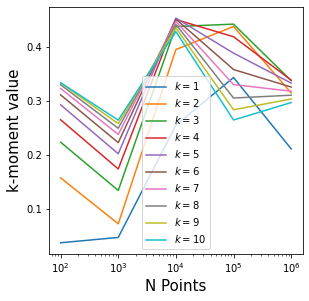

In [9]:
fig = plt.figure( figsize=(10,10) )
ax1 = fig.add_subplot(2,2,1)
for i in range(NMoments):
    ax1.plot(Points,Moments[i], label=r'$k=%.0f$' %(labelk[i]))
    
ax1.set_xscale('log')
ax1.set_xlabel('N Points', fontsize=15)
ax1.set_ylabel('k-moment value', fontsize=15)
ax1.legend()

**Con Numpy**

In [10]:
x = np.random.rand(10,10000)
print(x)

[[0.38993807 0.6061481  0.35478074 ... 0.95621248 0.97458865 0.6624917 ]
 [0.29982896 0.57709006 0.60272891 ... 0.90976777 0.82248369 0.10297878]
 [0.15002478 0.88194176 0.82452748 ... 0.43204013 0.71639461 0.67092587]
 ...
 [0.92819383 0.9920543  0.87338909 ... 0.95136811 0.26974092 0.98355664]
 [0.27158091 0.49220383 0.00349025 ... 0.61909011 0.091764   0.03389953]
 [0.6060786  0.31887615 0.72963737 ... 0.85182155 0.70134283 0.44195765]]


In [11]:
matrix = np.random.rand(2,4)
print(matrix)

[[0.99506467 0.26545565 0.12222911 0.7892501 ]
 [0.82628292 0.15780906 0.08859242 0.82451284]]


In [12]:
U = np.random.uniform( -5,5, 10000 )
Pois = np.random.poisson(size=10000)
Normal = np.random.standard_normal(size = 10000)
print(len(U),len(Pois),len(Normal),len(x))

10000 10000 10000 10


In [13]:
fig = plt.figure( figsize=(10,10) )

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
    ax1.plot(,U[i], label=r'$k=%.0f$' %(labelk[i]))
    ax2.plot(Points,Pois[i], label=r'$k=%.0f$' %(labelk[i]))   
    ax3.plot(Points,Normal[i], label=r'$k=%.0f$' %(labelk[i]))

ax1.set_xscale('log')
ax1.set_xlabel('N Points', fontsize=15)
ax1.set_ylabel('k-moment value', fontsize=15)
ax1.legend(loc=0)

ax2.set_xscale('log')
ax2.set_xlabel('N Points', fontsize=15)
ax2.set_ylabel('k-moment value', fontsize=15)
ax2.legend(loc=1)

ax3.set_xscale('log')
ax3.set_xlabel('N Points', fontsize=15)
ax3.set_ylabel('k-moment value', fontsize=15)
ax3.legend(loc=2)

IndentationError: unexpected indent (374461393.py, line 6)